# Detecting Skin Colors

## Displaying The Color Pixels on a 3D RGB Space

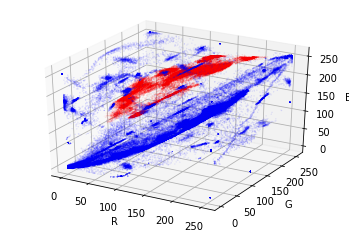

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import axes3d, Axes3D
from skimage import io

df = pd.read_csv('Color.txt', sep = '\t')

negative = df[df['Y'] == 1]
positive = df[df['Y'] == 2]

negative = np.array(negative)
positive = np.array(positive)

fig = plt.figure()
ax  = fig.add_subplot(111, projection = '3d')

negative_params = {'s': 0.005, 'color': 'red'}
positive_params = {'s': 0.005, 'color': 'blue'}

ax.scatter(negative[:, 0], negative[:, 1], negative[:, 2], **negative_params)
ax.scatter(positive[:, 0], positive[:, 1], positive[:, 2], **positive_params)

ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")

data = np.array(df)

for i in range(data.shape[0]):
    if data[i][3] == 2: data[i][3] = 1
    else: data[i][3] = 0

## Showing Skin and Non Skin Colors

### Skin Colors

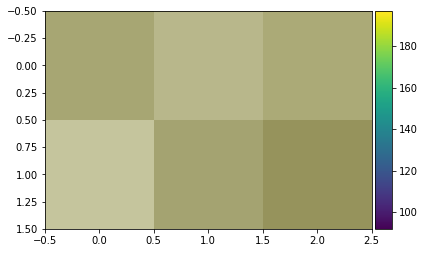

In [6]:
indices = np.array([[555, 200, 500], [55, 711, 312]], dtype = np.int64)
io.imshow(positive[:, :3][indices])
plt.show()

### Non Skin Colors

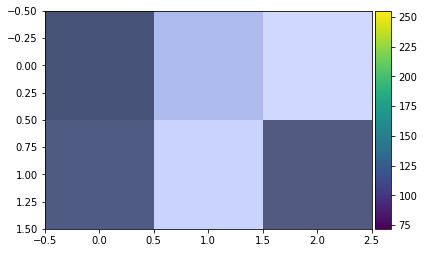

In [5]:
indices = np.array([[2, 800, 500], [600, 711, 400]], dtype = np.int64)
io.imshow(negative[:, :3][indices])
plt.show()

## Fitting a K Nearest Neighbor Classifier and Showing Performance

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

k_neighbor_classifier = KNeighborsClassifier(n_neighbors = 3)

np.random.shuffle(data)

X = data[:,:3]
y = data[:, 3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
k_neighbor_classifier.fit(X_train, y_train)

y_predict = k_neighbor_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
recall   = recall_score(y_test, y_predict)

print("Accuracy: %0.7f" % accuracy)
print("Recall:   %0.7f" % recall)


Accuracy: 0.9995103
Recall:   0.9994004
